In [1]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Conexión a la base de datos
conn = sqlite3.connect('volvo.db')

# Consulta para obtener las coordenadas de los vehículos
query = """
SELECT id_ciclo, nombre, coordenadas, "% nivel combustible", 
       "km hasta vacio", "velocidad(km/h)", actualizacion
FROM aquiEstoy
WHERE coordenadas IS NOT NULL
"""

# Cargar datos a un DataFrame
vehiculos_df = pd.read_sql_query(query, conn)

In [2]:
vehiculos_df

,id_ciclo,nombre,coordenadas,% nivel combustible,km hasta vacio,velocidad(km/h),actualizacion
0,13099-2025-03-07 19:53:24.086069,452 Tracto 6x4 EA 460,"-35.227998, -71.104321",87,663,0,Actualizado 19:51 hoy
1,13114-2025-03-07 19:53:32.500591,398 Tracto 6x4 EA 460,"-37.213253, -73.226226",87,949,0,Actualizado 19:35 hoy
2,13129-2025-03-07 19:53:43.910699,443 Tracto 6x4 EA 460,"-35.472652, -72.244609",76,576,87,Actualizado 19:53 hoy
3,13144-2025-03-07 19:53:55.803714,448 Tracto 6x4 EA 460,"-35.627042, -71.740468",76,790,73,Actualizado 19:53 hoy
4,13158-2025-03-07 19:54:07.082449,379 Tracto 6X4 EA 460,"-39.537691, -72.869317",69,439,0,Actualizado 18:25 hoy
...,...,...,...,...,...,...,...
104,14533-2025-03-07 20:04:25.700185,464 Tracto 6x4 EA 460,"-37.549643, -72.598153",80,835,0,Actualizado 17:02 hoy
105,14544-2025-03-07 20:04:36.360145,463 Tracto 6x4 EA 460,"-37.531086, -72.622945",83,852,72,Actualizado 20:03 hoy
106,14560-2025-03-07 20:04:47.622517,386 Tracto 6X4 EA 460,"-39.55728, -72.966042",100,1110,0,Actualizado 19:25 hoy
107,14574-2025-03-07 20:04:58.500605,406 Tracto 6x4 EA 460,"-37.070592, -73.104876",57,483,0,Actualizado 20:01 hoy


In [3]:
# Función para extraer latitud y longitud de la columna 'coordenadas'
def extraer_coordenadas(coord_str):
    try:
        # Asumiendo que coordenadas está en formato "lat, lon"
        lat, lon = coord_str.split(',')
        return float(lat.strip()), float(lon.strip())
    except:
        return None, None

# Aplicar la función a cada fila
vehiculos_df[['latitud', 'longitud']] = vehiculos_df['coordenadas'].apply(
    lambda x: pd.Series(extraer_coordenadas(x))
)

# Filtrar filas con coordenadas inválidas
vehiculos_df = vehiculos_df.dropna(subset=['latitud', 'longitud'])

In [4]:
vehiculos_df

,id_ciclo,nombre,coordenadas,% nivel combustible,km hasta vacio,velocidad(km/h),actualizacion,latitud,longitud
0,13099-2025-03-07 19:53:24.086069,452 Tracto 6x4 EA 460,"-35.227998, -71.104321",87,663,0,Actualizado 19:51 hoy,-35.227998,-71.104321
1,13114-2025-03-07 19:53:32.500591,398 Tracto 6x4 EA 460,"-37.213253, -73.226226",87,949,0,Actualizado 19:35 hoy,-37.213253,-73.226226
2,13129-2025-03-07 19:53:43.910699,443 Tracto 6x4 EA 460,"-35.472652, -72.244609",76,576,87,Actualizado 19:53 hoy,-35.472652,-72.244609
3,13144-2025-03-07 19:53:55.803714,448 Tracto 6x4 EA 460,"-35.627042, -71.740468",76,790,73,Actualizado 19:53 hoy,-35.627042,-71.740468
4,13158-2025-03-07 19:54:07.082449,379 Tracto 6X4 EA 460,"-39.537691, -72.869317",69,439,0,Actualizado 18:25 hoy,-39.537691,-72.869317
...,...,...,...,...,...,...,...,...,...
104,14533-2025-03-07 20:04:25.700185,464 Tracto 6x4 EA 460,"-37.549643, -72.598153",80,835,0,Actualizado 17:02 hoy,-37.549643,-72.598153
105,14544-2025-03-07 20:04:36.360145,463 Tracto 6x4 EA 460,"-37.531086, -72.622945",83,852,72,Actualizado 20:03 hoy,-37.531086,-72.622945
106,14560-2025-03-07 20:04:47.622517,386 Tracto 6X4 EA 460,"-39.55728, -72.966042",100,1110,0,Actualizado 19:25 hoy,-39.557280,-72.966042
107,14574-2025-03-07 20:04:58.500605,406 Tracto 6x4 EA 460,"-37.070592, -73.104876",57,483,0,Actualizado 20:01 hoy,-37.070592,-73.104876


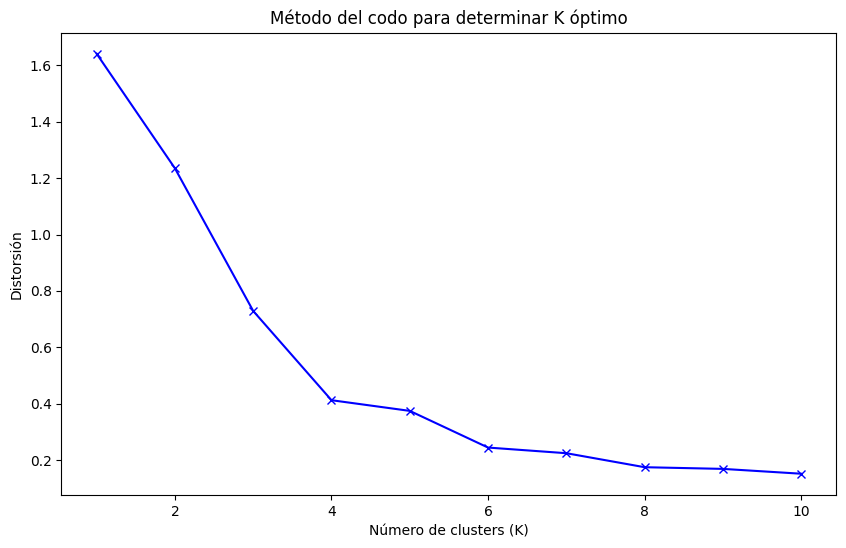

In [6]:
# Determinar el número óptimo de clusters (K)
# Para este ejemplo, usaremos el método del codo
coords = vehiculos_df[['latitud', 'longitud']].values
distortions = []
K_range = range(1, 11)  # Probar entre 1 y 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coords)
    distortions.append(sum(np.min(cdist(coords, kmeans.cluster_centers_, 'euclidean'), axis=1)) / coords.shape[0])

# Visualizar el codo para determinar K óptimo
plt.figure(figsize=(10, 6))
plt.plot(K_range, distortions, 'bx-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Distorsión')
plt.title('Método del codo para determinar K óptimo')
plt.savefig('k_optimo.png')

# Aplicar K-means con el K óptimo (supondremos K=5 para este ejemplo)
k_optimo = 5  # Ajustar según el análisis anterior
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
vehiculos_df['cluster'] = kmeans.fit_predict(coords)

# Obtener los centroides
centroides = pd.DataFrame(kmeans.cluster_centers_, columns=['centroide_lat', 'centroide_lon'])
centroides['cluster'] = centroides.index

In [7]:
# Resumen por cluster
resumen_clusters = vehiculos_df.groupby('cluster').agg({
    'id_ciclo': 'count',
    '% nivel combustible': 'mean',
    'km hasta vacio': 'mean',
    'velocidad(km/h)': 'mean',
    'latitud': ['min', 'max', 'mean'],
    'longitud': ['min', 'max', 'mean']
}).reset_index()

print(resumen_clusters)

  cluster id_ciclo % nivel combustible km hasta vacio velocidad(km/h)  \
             count                mean           mean            mean   
0       0      371           76.530997     841.191375       18.425876   
1       1        3           62.666667     450.000000       37.666667   
2       2      197           77.568528     794.005076       22.644670   
3       3       45           87.600000    1053.844444       20.711111   
4       4       62           84.129032    1058.935484       29.564516   

     latitud                         longitud                        
         min        max       mean        min        max       mean  
0 -38.266179 -37.021769 -37.492669 -73.625772 -71.803225 -72.780117  
1   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  
2 -40.085455 -38.744820 -39.612019 -73.212808 -72.264459 -72.874273  
3 -35.594325 -35.383829 -35.487691 -72.539943 -71.972448 -72.399364  
4 -36.445740 -35.019253 -35.511534 -71.930015 -71.100891 -71.534768 

In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster, HeatMap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Definir directorio base para guardar archivos
BASE_DIR = os.path.dirname(os.path.abspath(__file__))
OUTPUT_DIR = os.path.join(BASE_DIR, 'output')
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Función para determinar el número óptimo de clusters (método del codo)
def encontrar_k_optimo(coords, max_k=10):
    distortions = []
    K_range = range(1, max_k + 1)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(coords)
        distortions.append(sum(np.min(np.linalg.norm(coords - kmeans.cluster_centers_[kmeans.labels_], axis=1)**2)))
    
    # Guardar gráfico del método del codo
    plt.figure(figsize=(10, 6))
    plt.plot(K_range, distortions, 'bx-')
    plt.xlabel('Número de clusters (K)')
    plt.ylabel('Distorsión')
    plt.title('Método del codo para determinar K óptimo')
    plt.grid(True, alpha=0.3)
    plt.savefig(os.path.join(OUTPUT_DIR, 'k_optimo.png'))
    
    # Calcular la "pendiente del codo" para determinar automáticamente K
    # (simplificación: diferencia de pendientes)
    deltas = np.diff(distortions)
    delta_deltas = np.diff(deltas)
    k_optimo = np.argmax(delta_deltas) + 2  # +2 por los offsets de diff
    
    return k_optimo

# Función para aplicar K-means y generar el mapa
def generar_mapa_vehiculos(df, k=None):
    # Prepara los datos para clustering
    coords = df[['latitud', 'longitud']].values
    
    # Si no se especifica k, encontrar el óptimo
    if k is None:
        k = encontrar_k_optimo(coords)
        print(f"Número óptimo de clusters encontrado: {k}")
    
    # Aplicar K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['cluster'] = kmeans.fit_predict(coords)
    
    # Obtener centroides
    centroides = pd.DataFrame(
        kmeans.cluster_centers_, 
        columns=['latitud', 'longitud']
    )
    centroides['cluster'] = centroides.index
    
    # Contar vehículos por cluster
    conteo_cluster = df['cluster'].value_counts().sort_index()
    centroides['num_vehiculos'] = centroides['cluster'].map(conteo_cluster)
    
    # Crear un mapa centrado en el promedio de coordenadas
    mapa = folium.Map(
        location=[df['latitud'].mean(), df['longitud'].mean()],
        zoom_start=12,
        tiles='CartoDB positron'  # Mapa base limpio
    )
    
    # Añadir capa de control para activar/desactivar elementos
    folium.LayerControl().add_to(mapa)
    
    # Lista de colores para los clusters
    colores = list(mcolors.TABLEAU_COLORS.values())
    
    # Crear una capa para cada cluster
    for i in range(k):
        cluster_data = df[df['cluster'] == i]
        color = colores[i % len(colores)]
        
        # Crear capa de grupo para este cluster
        cluster_group = folium.FeatureGroup(name=f'Cluster {i} ({len(cluster_data)} vehículos)')
        
        # Añadir puntos del cluster
        for idx, row in cluster_data.iterrows():
            tooltip = f"""
            <strong>ID: {row['id_ciclo']}</strong><br>
            Vehículo: {row['nombre']}<br>
            Nivel combustible: {row['% nivel combustible']}%<br>
            Km hasta vacío: {row['km hasta vacio']}<br>
            Velocidad: {row['velocidad(km/h)']} km/h<br>
            Actualización: {row['actualizacion']}
            """
            
            folium.CircleMarker(
                location=[row['latitud'], row['longitud']],
                radius=5,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.6,
                tooltip=tooltip
            ).add_to(cluster_group)
        
        # Añadir capa al mapa
        cluster_group.add_to(mapa)
    
    # Añadir centroides al mapa
    centroid_group = folium.FeatureGroup(name='Centroides')
    for idx, row in centroides.iterrows():
        color = colores[idx % len(colores)]
        folium.Marker(
            location=[row['latitud'], row['longitud']],
            icon=folium.Icon(color='white', icon='star', prefix='fa'),
            tooltip=f"Centroide Cluster {row['cluster']}: {row['num_vehiculos']} vehículos"
        ).add_to(centroid_group)
    
    centroid_group.add_to(mapa)
    
    # Añadir mapa de calor como capa opcional
    heat_data = [[row['latitud'], row['longitud']] for _, row in df.iterrows()]
    HeatMap(heat_data, radius=15).add_to(folium.FeatureGroup(name='Mapa de Calor').add_to(mapa))
    
    # Guardar el mapa
    mapa_path = os.path.join(OUTPUT_DIR, 'mapa_vehiculos.html')
    mapa.save(mapa_path)
    
    return mapa, centroides, k

# Función principal para procesar datos y generar visualizaciones
def analizar_ubicaciones_vehiculos(df, k=None):
    """
    Analiza las ubicaciones de vehículos usando K-means y genera visualizaciones.
    
    Args:
        df: DataFrame con columnas 'latitud' y 'longitud'
        k: Número de clusters (si es None, se determina automáticamente)
    
    Returns:
        DataFrame con los centroides de los clusters
    """
    # Verificar que df tenga las columnas necesarias
    for col in ['latitud', 'longitud']:
        if col not in df.columns:
            raise ValueError(f"El DataFrame debe contener la columna '{col}'")
    
    # Generar mapa
    mapa, centroides, k_usado = generar_mapa_vehiculos(df, k)
    
    # Generar visualización en matplotlib (opcional)
    plt.figure(figsize=(12, 10))
    
    # Graficar puntos por cluster
    for cluster in df['cluster'].unique():
        subset = df[df['cluster'] == cluster]
        plt.scatter(subset['longitud'], subset['latitud'], 
                   label=f'Cluster {cluster} ({len(subset)} vehículos)', alpha=0.7)
    
    # Graficar centroides
    plt.scatter(centroides['longitud'], centroides['latitud'], 
               s=200, c='black', marker='X', label='Centroides')
    
    # Añadir etiquetas a centroides
    for i, row in centroides.iterrows():
        plt.annotate(f"C{i}", 
                    (row['longitud'], row['latitud']),
                    fontsize=12, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))
    
    plt.title(f'Agrupamiento de {len(df)} Vehículos en {k_usado} Clusters')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.savefig(os.path.join(OUTPUT_DIR, 'clusters_matplotlib.png'), dpi=300, bbox_inches='tight')
    
    # Imprimir resumen
    print(f"Análisis completado:")
    print(f"- {len(df)} vehículos analizados")
    print(f"- {k_usado} clusters identificados")
    print(f"- Archivos generados en: {OUTPUT_DIR}")
    print(f"  - mapa_vehiculos.html (mapa interactivo)")
    print(f"  - clusters_matplotlib.png (gráfico estático)")
    print(f"  - k_optimo.png (método del codo)")
    
    return centroides

# Para ejecutar el código:
# Asumiendo que ya tienes el DataFrame 'vehiculos_df' con columnas 'latitud' y 'longitud'
# centroides = analizar_ubicaciones_vehiculos(vehiculos_df)

NameError: name '__file__' is not defined

In [8]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster, HeatMap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Definir directorio base para guardar archivos (versión compatible con notebook)
import os
try:
    # Si estamos en un script
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Si estamos en un notebook o IPython
    import tempfile
    BASE_DIR = os.getcwd()  # Directorio de trabajo actual

OUTPUT_DIR = os.path.join(BASE_DIR, 'output')
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Función para determinar el número óptimo de clusters (método del codo)
def encontrar_k_optimo(coords, max_k=10):
    distortions = []
    K_range = range(1, max_k + 1)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(coords)
        distortions.append(sum(np.min(np.linalg.norm(coords - kmeans.cluster_centers_[kmeans.labels_], axis=1)**2)))
    
    # Guardar gráfico del método del codo
    plt.figure(figsize=(10, 6))
    plt.plot(K_range, distortions, 'bx-')
    plt.xlabel('Número de clusters (K)')
    plt.ylabel('Distorsión')
    plt.title('Método del codo para determinar K óptimo')
    plt.grid(True, alpha=0.3)
    plt.savefig(os.path.join(OUTPUT_DIR, 'k_optimo.png'))
    
    # Calcular la "pendiente del codo" para determinar automáticamente K
    # (simplificación: diferencia de pendientes)
    deltas = np.diff(distortions)
    delta_deltas = np.diff(deltas)
    k_optimo = np.argmax(delta_deltas) + 2  # +2 por los offsets de diff
    
    return k_optimo

# Función para aplicar K-means y generar el mapa
def generar_mapa_vehiculos(df, k=None):
    # Prepara los datos para clustering
    coords = df[['latitud', 'longitud']].values
    
    # Si no se especifica k, encontrar el óptimo
    if k is None:
        k = encontrar_k_optimo(coords)
        print(f"Número óptimo de clusters encontrado: {k}")
    
    # Aplicar K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['cluster'] = kmeans.fit_predict(coords)
    
    # Obtener centroides
    centroides = pd.DataFrame(
        kmeans.cluster_centers_, 
        columns=['latitud', 'longitud']
    )
    centroides['cluster'] = centroides.index
    
    # Contar vehículos por cluster
    conteo_cluster = df['cluster'].value_counts().sort_index()
    centroides['num_vehiculos'] = centroides['cluster'].map(conteo_cluster)
    
    # Crear un mapa centrado en el promedio de coordenadas
    mapa = folium.Map(
        location=[df['latitud'].mean(), df['longitud'].mean()],
        zoom_start=12,
        tiles='CartoDB positron'  # Mapa base limpio
    )
    
    # Añadir capa de control para activar/desactivar elementos
    folium.LayerControl().add_to(mapa)
    
    # Lista de colores para los clusters
    colores = list(mcolors.TABLEAU_COLORS.values())
    
    # Crear una capa para cada cluster
    for i in range(k):
        cluster_data = df[df['cluster'] == i]
        color = colores[i % len(colores)]
        
        # Crear capa de grupo para este cluster
        cluster_group = folium.FeatureGroup(name=f'Cluster {i} ({len(cluster_data)} vehículos)')
        
        # Añadir puntos del cluster
        for idx, row in cluster_data.iterrows():
            tooltip = f"""
            <strong>ID: {row['id_ciclo']}</strong><br>
            Vehículo: {row['nombre']}<br>
            Nivel combustible: {row['% nivel combustible']}%<br>
            Km hasta vacío: {row['km hasta vacio']}<br>
            Velocidad: {row['velocidad(km/h)']} km/h<br>
            Actualización: {row['actualizacion']}
            """
            
            folium.CircleMarker(
                location=[row['latitud'], row['longitud']],
                radius=5,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.6,
                tooltip=tooltip
            ).add_to(cluster_group)
        
        # Añadir capa al mapa
        cluster_group.add_to(mapa)
    
    # Añadir centroides al mapa
    centroid_group = folium.FeatureGroup(name='Centroides')
    for idx, row in centroides.iterrows():
        color = colores[idx % len(colores)]
        folium.Marker(
            location=[row['latitud'], row['longitud']],
            icon=folium.Icon(color='white', icon='star', prefix='fa'),
            tooltip=f"Centroide Cluster {row['cluster']}: {row['num_vehiculos']} vehículos"
        ).add_to(centroid_group)
    
    centroid_group.add_to(mapa)
    
    # Añadir mapa de calor como capa opcional
    heat_data = [[row['latitud'], row['longitud']] for _, row in df.iterrows()]
    HeatMap(heat_data, radius=15).add_to(folium.FeatureGroup(name='Mapa de Calor').add_to(mapa))
    
    # Guardar el mapa
    mapa_path = os.path.join(OUTPUT_DIR, 'mapa_vehiculos.html')
    mapa.save(mapa_path)
    print(f"Mapa guardado en: {mapa_path}")
    
    return mapa, centroides, k

# Función principal para procesar datos y generar visualizaciones
def analizar_ubicaciones_vehiculos(df, k=None):
    """
    Analiza las ubicaciones de vehículos usando K-means y genera visualizaciones.
    
    Args:
        df: DataFrame con columnas 'latitud' y 'longitud'
        k: Número de clusters (si es None, se determina automáticamente)
    
    Returns:
        DataFrame con los centroides de los clusters
    """
    # Verificar que df tenga las columnas necesarias
    for col in ['latitud', 'longitud']:
        if col not in df.columns:
            raise ValueError(f"El DataFrame debe contener la columna '{col}'")
    
    # Generar mapa
    mapa, centroides, k_usado = generar_mapa_vehiculos(df, k)
    
    # Generar visualización en matplotlib (opcional)
    plt.figure(figsize=(12, 10))
    
    # Graficar puntos por cluster
    for cluster in df['cluster'].unique():
        subset = df[df['cluster'] == cluster]
        plt.scatter(subset['longitud'], subset['latitud'], 
                   label=f'Cluster {cluster} ({len(subset)} vehículos)', alpha=0.7)
    
    # Graficar centroides
    plt.scatter(centroides['longitud'], centroides['latitud'], 
               s=200, c='black', marker='X', label='Centroides')
    
    # Añadir etiquetas a centroides
    for i, row in centroides.iterrows():
        plt.annotate(f"C{i}", 
                    (row['longitud'], row['latitud']),
                    fontsize=12, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))
    
    plt.title(f'Agrupamiento de {len(df)} Vehículos en {k_usado} Clusters')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.savefig(os.path.join(OUTPUT_DIR, 'clusters_matplotlib.png'), dpi=300, bbox_inches='tight')
    
    # Imprimir resumen
    print(f"Análisis completado:")
    print(f"- {len(df)} vehículos analizados")
    print(f"- {k_usado} clusters identificados")
    print(f"- Archivos generados en: {OUTPUT_DIR}")
    print(f"  - mapa_vehiculos.html (mapa interactivo)")
    print(f"  - clusters_matplotlib.png (gráfico estático)")
    print(f"  - k_optimo.png (método del codo)")
    
    return centroides

# EJEMPLO DE USO EN NOTEBOOK:
# ===========================
# Asumiendo que ya tienes el DataFrame 'vehiculos_df' con columnas 'latitud' y 'longitud'
# (descomenta las siguientes líneas para ejecutar)

# Para ejecutar con determinación automática de clusters:
# centroides = analizar_ubicaciones_vehiculos(vehiculos_df)

# Para ejecutar con un número específico de clusters:
# centroides = analizar_ubicaciones_vehiculos(vehiculos_df, k=5)

# Para visualizar el mapa dentro del notebook:
# from IPython.display import IFrame
# IFrame('output/mapa_vehiculos.html', width=800, height=600)

In [9]:
import folium
from folium.plugins import MarkerCluster

# Crear un mapa centrado en las coordenadas promedio
mapa = folium.Map(location=[vehiculos_df['latitud'].mean(), 
                           vehiculos_df['longitud'].mean()], 
                 zoom_start=10)

# Añadir los puntos coloreados por cluster
colores = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 
          'lightred', 'beige', 'darkblue', 'darkgreen']

# Añadir todos los puntos con colores según su cluster
for idx, row in vehiculos_df.iterrows():
    color = colores[row['cluster'] % len(colores)]
    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"ID: {row['id_ciclo']}<br>Cluster: {row['cluster']}"
    ).add_to(mapa)

# Añadir los centroides con marcadores más grandes
for idx, row in centroides.iterrows():
    color = colores[row['cluster'] % len(colores)]
    folium.CircleMarker(
        location=[row['centroide_lat'], row['centroide_lon']],
        radius=10,
        color='black',
        fill=True,
        fill_color=color,
        fill_opacity=0.9,
        popup=f"Centroide Cluster: {row['cluster']}"
    ).add_to(mapa)

# Guardar el mapa como HTML
mapa.save('mapa_clusters.html')

# Mostrar el mapa (en notebook)
mapa

KeyError: 'cluster'

In [10]:
import matplotlib.pyplot as plt

# Crear la figura
plt.figure(figsize=(12, 10))

# Graficar los puntos coloreados por cluster
for cluster in vehiculos_df['cluster'].unique():
    subset = vehiculos_df[vehiculos_df['cluster'] == cluster]
    plt.scatter(subset['longitud'], subset['latitud'], 
                label=f'Cluster {cluster}', alpha=0.7)

# Graficar los centroides
plt.scatter(centroides['centroide_lon'], centroides['centroide_lat'], 
            s=200, c='black', marker='X', label='Centroides')

# Añadir etiquetas
for i, centroide in centroides.iterrows():
    plt.annotate(f"C{i}", 
                 (centroide['centroide_lon'], centroide['centroide_lat']),
                 fontsize=12)

# Añadir leyenda y títulos
plt.title('Agrupamiento de Vehículos por Ubicación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True, alpha=0.3)

# Guardar la imagen
plt.savefig('clusters_vehiculos.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

KeyError: 'cluster'

<Figure size 1200x1000 with 0 Axes>

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import folium

# Supongamos que vehiculos_df ya tiene las columnas 'latitud' y 'longitud'

# Preparar los datos para el clustering
coordenadas = vehiculos_df[['latitud', 'longitud']]

# Aplicar K-means
kmeans = KMeans(n_clusters=5)  # Ajusta el número de clusters según sea necesario
vehiculos_df['cluster'] = kmeans.fit_predict(coordenadas)

# Obtener los centroides
centroides = pd.DataFrame(kmeans.cluster_centers_, columns=['centroide_lat', 'centroide_lon'])
centroides['cluster'] = centroides.index

# Visualizar en un mapa
mapa = folium.Map(location=[vehiculos_df['latitud'].mean(), vehiculos_df['longitud'].mean()], zoom_start=10)

colores = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen']

for idx, row in vehiculos_df.iterrows():
    color = colores[row['cluster'] % len(colores)]
    folium.CircleMarker(location=[row['latitud'], row['longitud']], radius=5, color=color, fill=True, fill_color=color, fill_opacity=0.7, popup=f"ID: {row['id_ciclo']}<br>Cluster: {row['cluster']}").add_to(mapa)

for idx, row in centroides.iterrows():
    # Convertir row['cluster'] a entero
    cluster_index = int(row['cluster'])  
    color = colores[cluster_index % len(colores)]
    folium.CircleMarker(location=[row['centroide_lat'], row['centroide_lon']], radius=10, color='black', fill=True, fill_color=color, fill_opacity=0.9, popup=f"Centroide Cluster: {cluster_index}").add_to(mapa)

mapa.save('mapa_clusters.html')
mapa